In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv("./data/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
#get the size of dataframe
print ("Number of rows are:" , df.shape[0])
print ("Number of columns are: " , df.shape[1])

Number of rows are: 1338
Number of columns are:  7


In [7]:
print ("Features :", df.columns.tolist())

Features : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [8]:
print ("Unique values:\n", df.nunique())

Unique values:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [9]:
#Check for the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#Strings (object dtype) take up more memory.
#category stores the unique values once and replaces the rest with integer codes.
df.sex=df['sex'].astype("category")
df.smoker=df['smoker'].astype("category")
df.region=df['region'].astype("category")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [13]:
num_cols=df._get_numeric_data().columns.tolist()
print(num_cols)

['age', 'bmi', 'children', 'charges']


In [14]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['region', 'sex', 'smoker']


In [15]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
df.describe(include='category').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


##Exploratory Data Analysis

In [17]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [18]:
## disr_plot == Distribution plot
# kde=Kernle distribution plot
def dist_plot(data, column):
    sns.kdeplot(data[column], color='purple',)
    
    # avg line
    plt.axvline(df[column].mean(), color='purple', label='mean')
    plt.axvline(df[column].median(), color='orange', label='median')
    plt.axvline(df[column].mode()[0], color='red', label='mode')
    plt.legend()

    plt.xlabel(column)
    plt.ylabel('Count/Distribution')
    plt.title('Spread of data for ' + column, fontdict={'fontsize':10}) 
    plt.show()
    

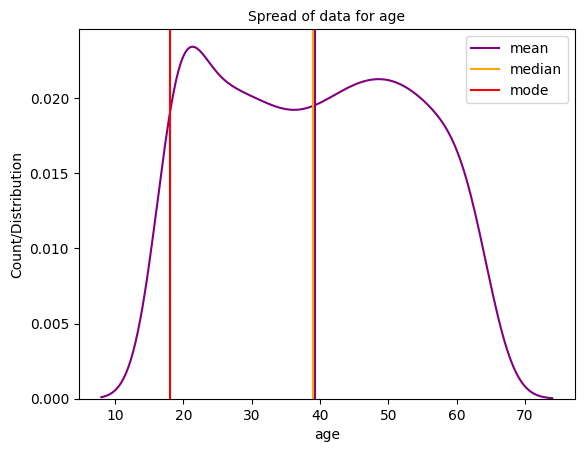

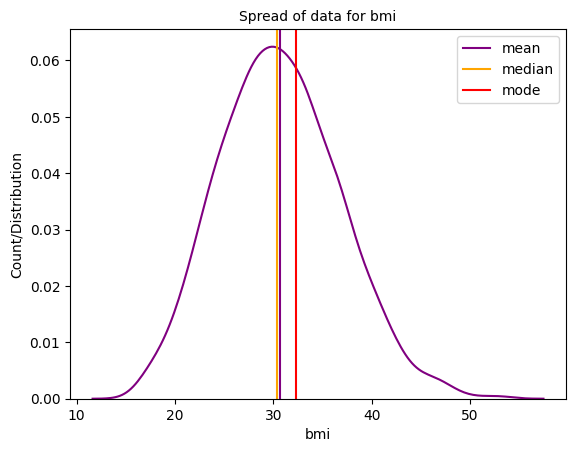

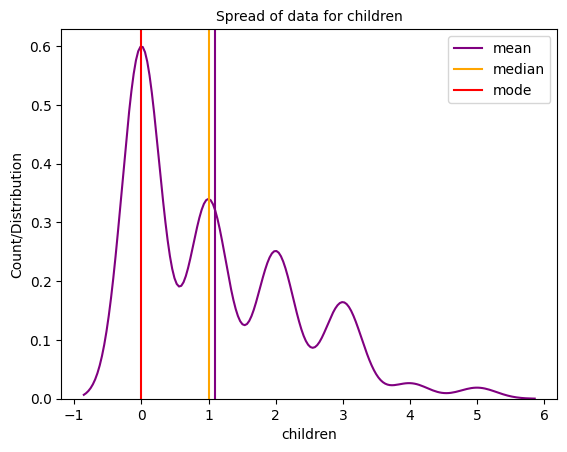

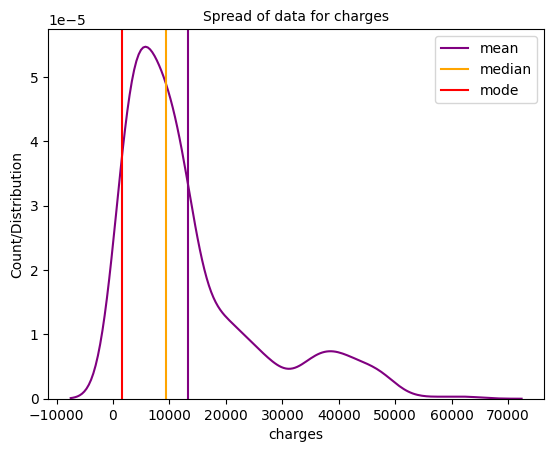

In [19]:
for col in num_cols:
    dist_plot(df, col)

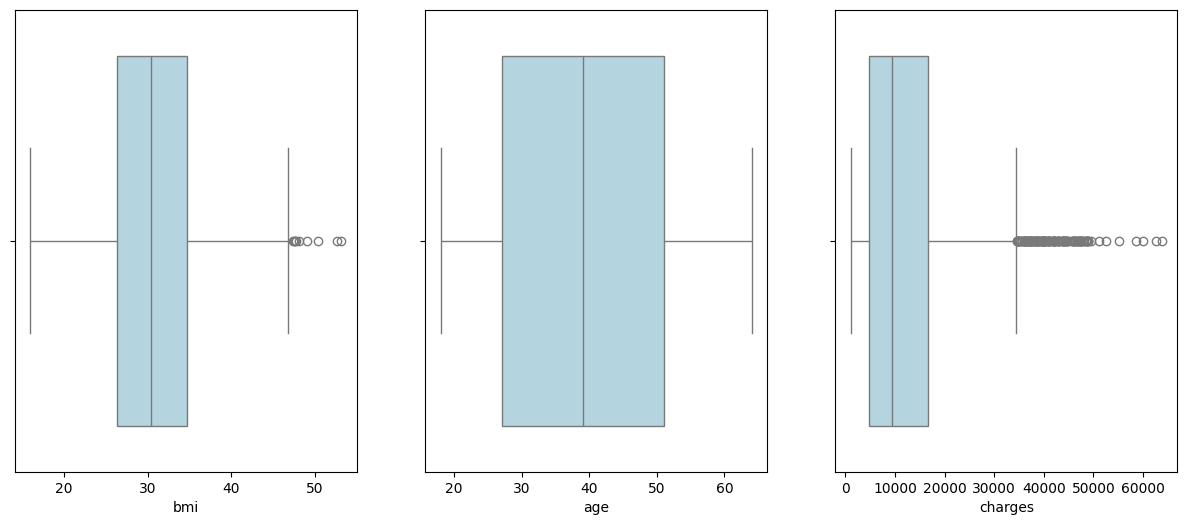

In [20]:
#Checking for the outliers
fig, axes=plt.subplots(figsize=(15, 6), nrows=1, ncols=3)
#plt.figure(figsize= (20,15))
#plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color='lightblue', ax=axes[0])

sns.boxplot(x=df.age, color='lightblue', ax=axes[1])

sns.boxplot(x=df.charges, color='lightblue', ax=axes[2])
plt.show()

In [21]:
df['region'].value_counts(normalize=True)

region
southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64

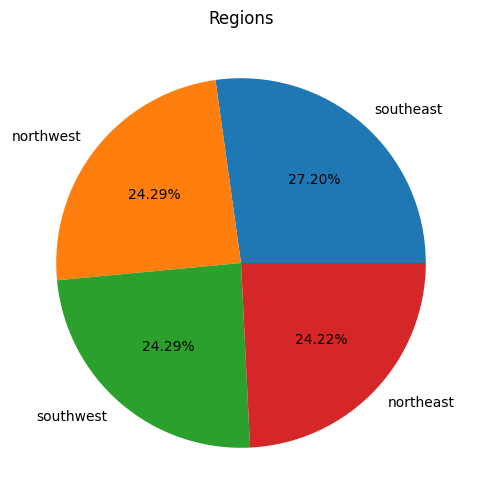

In [22]:
type_value_count = df['region'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
plt.pie(type_value_count, labels=type_value_count.index, autopct='%1.2f%%')
plt.title('Regions')
plt.show()

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\4283057625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


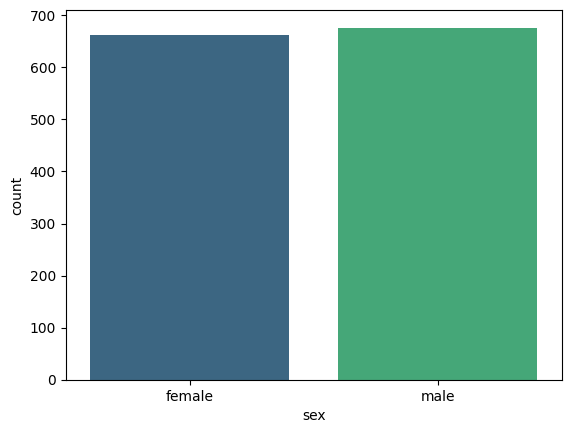

In [23]:
sns.countplot(x='sex', data=df, palette='viridis')
plt.show()

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\3591278323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='viridis')


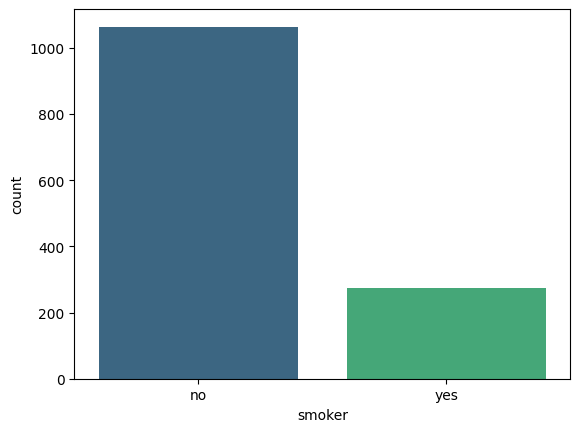

In [24]:
sns.countplot(x='smoker', data=df, palette='viridis')
plt.show()


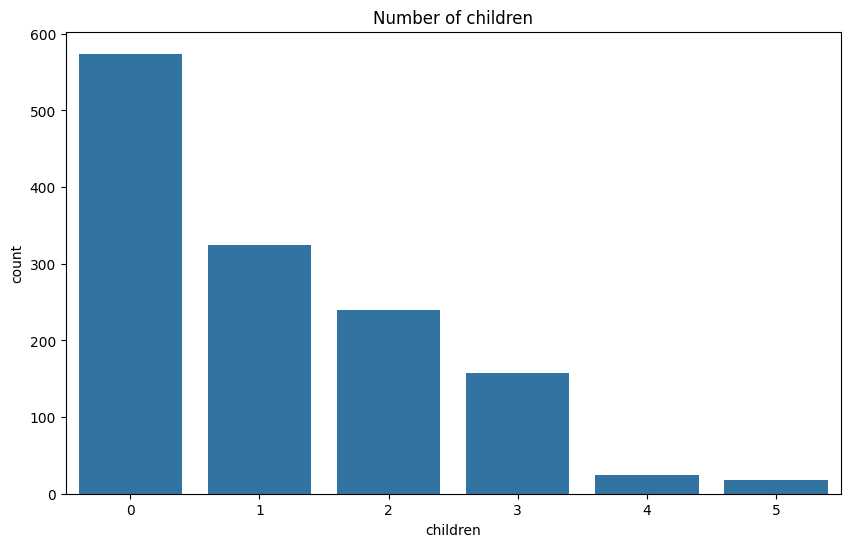

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='children')
plt.title('Number of children')
plt.show()

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\3952669598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], fit=stats.norm)


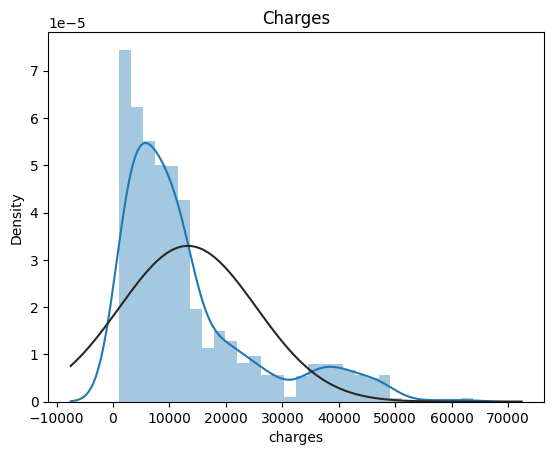

In [26]:
sns.distplot(df['charges'], fit=stats.norm)
plt.title('Charges')
plt.show()


##Data is highly right skewed. We transform data to make it normal

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\153396121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['charges']), fit=stats.norm)


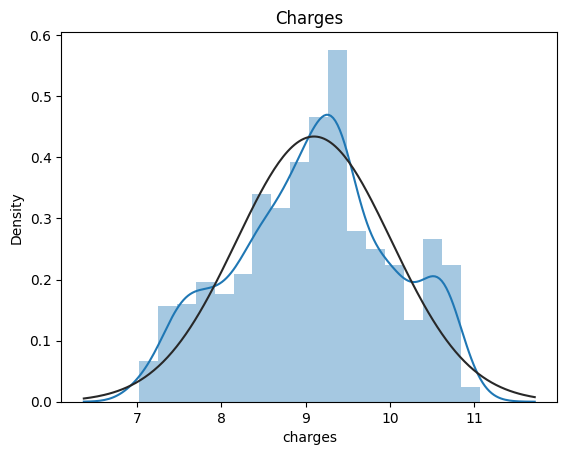

In [27]:
sns.distplot(np.log(df['charges']), fit=stats.norm)
plt.title('Charges')
plt.show()

##Checking Normality using Q-Q Plot

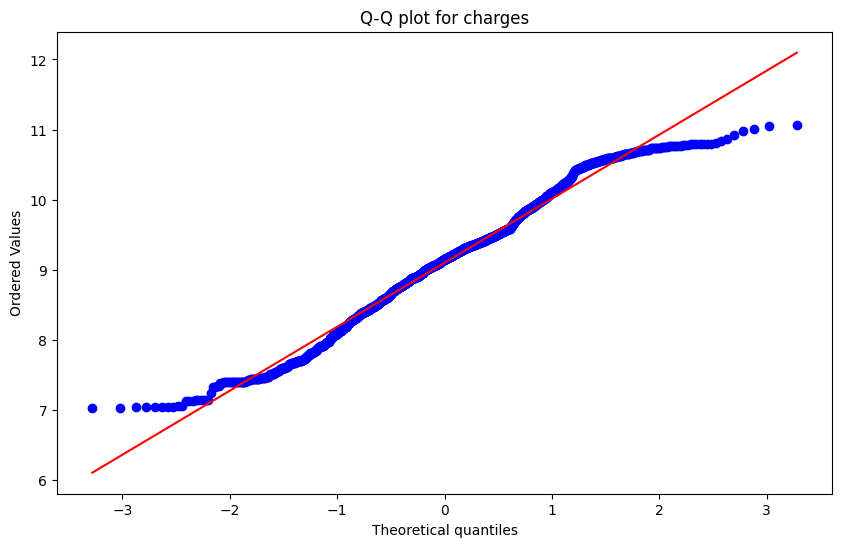

In [28]:
plt.figure(figsize=(10,6))
stats.probplot(df['charges'].apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()

##The Q-Q plot shows that after taking the log of "charges," your data is almost normal.

Most of your data fits the normal distribution, with only a few points at the ends being a bit off.

This means your transformation worked well, and your data is now suitable for analyses that require normality.

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Bivariate and Multivariate Analysis

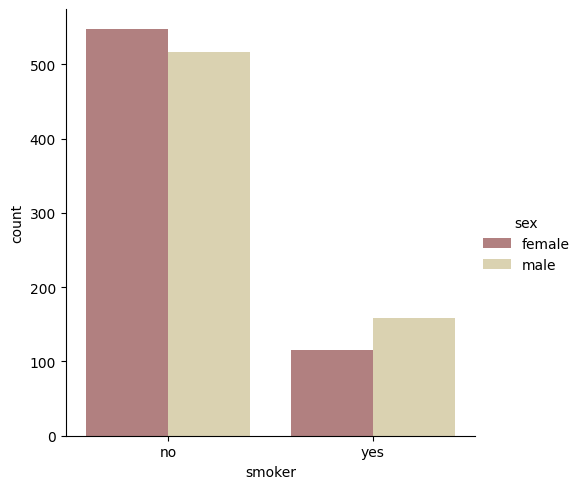

In [30]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)
plt.show()

In [31]:
df[df['age']<18]



,age,sex,bmi,children,smoker,region,charges


In [32]:
df_18=df[(df.age == 18)]

In [33]:
df_18.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075


Text(0.5, 1.0, 'Smoker vs Region')

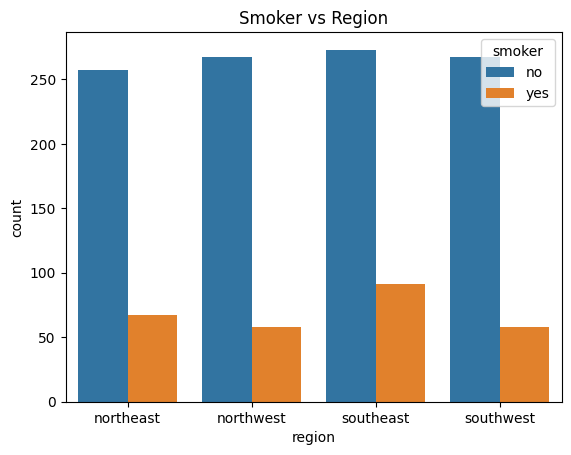

In [34]:
#region vs smoker
sns.countplot(x='region',hue='smoker',data=df)
plt.title("Smoker vs Region")

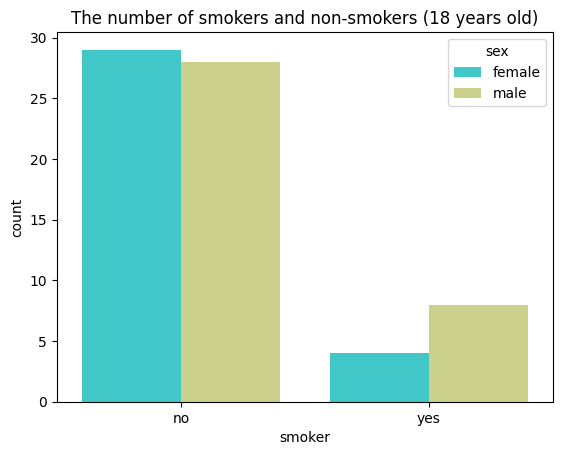

In [35]:
sns.countplot(x='smoker', hue='sex', data=df_18, palette='rainbow')
plt.title("The number of smokers and non-smokers (18 years old)")
plt.show()

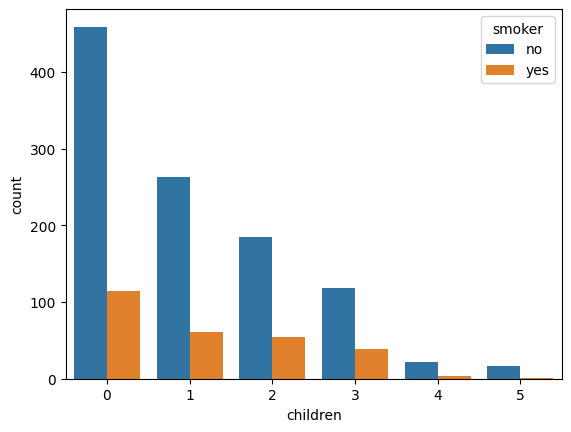

In [36]:
sns.countplot(x='children', hue='smoker', data=df)
plt.show()

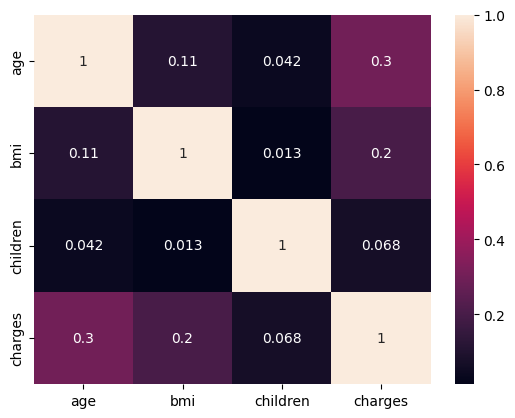

In [37]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


We can see good co-relation between the age and charges

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\2272793521.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='charges', data=df, palette='magma')


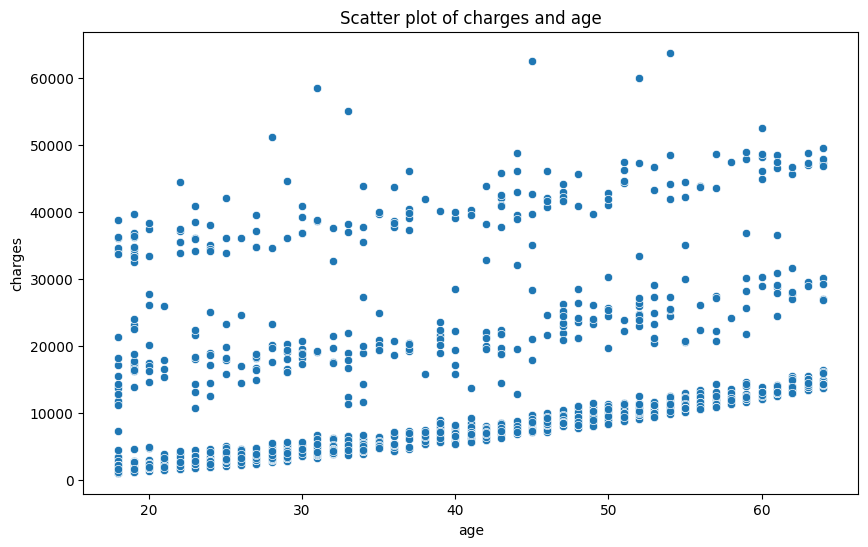

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\2272793521.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='charges', data=df, palette='magma')


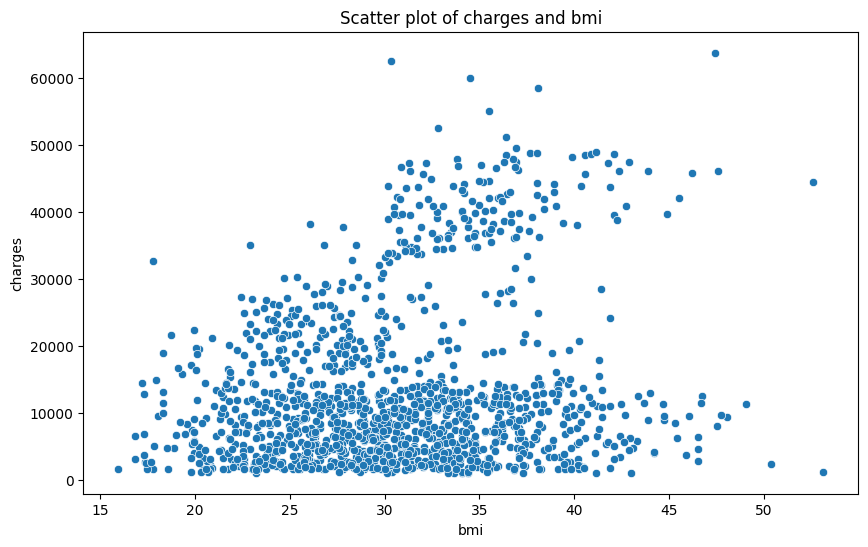

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\2272793521.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='charges', data=df, palette='magma')


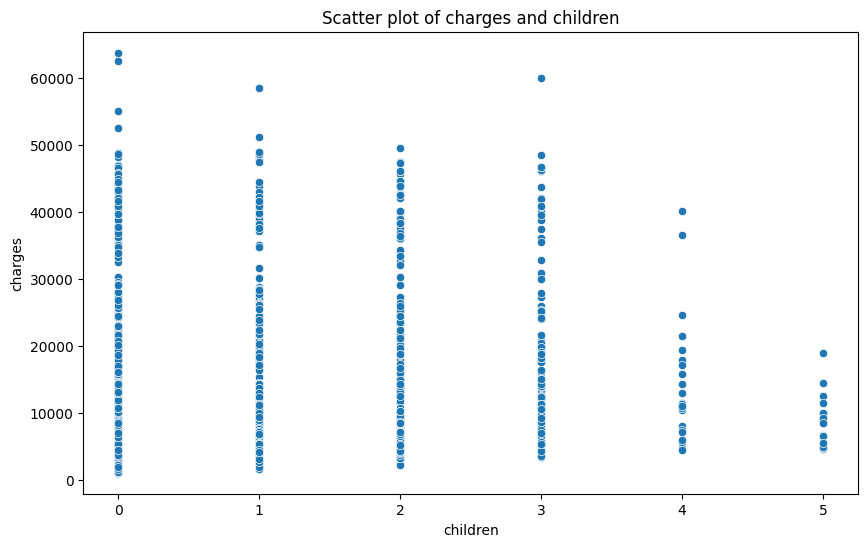

In [38]:
for col in num_cols:
    if col!='charges':
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=col, y='charges', data=df, palette='magma')
        plt.title(f'Scatter plot of charges and {col}')
        plt.show()

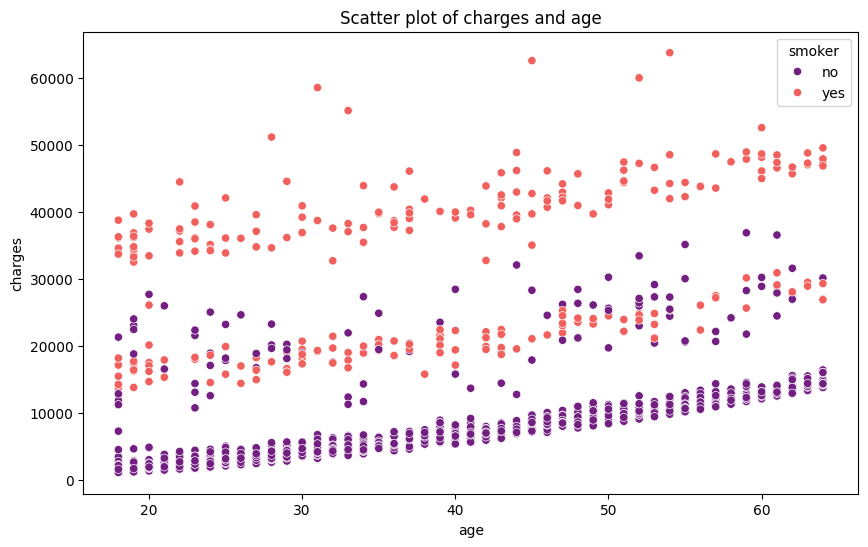

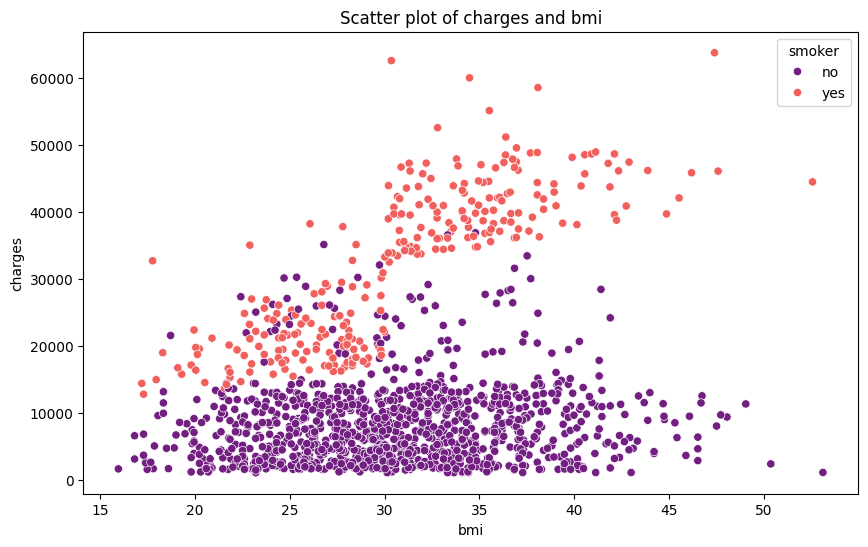

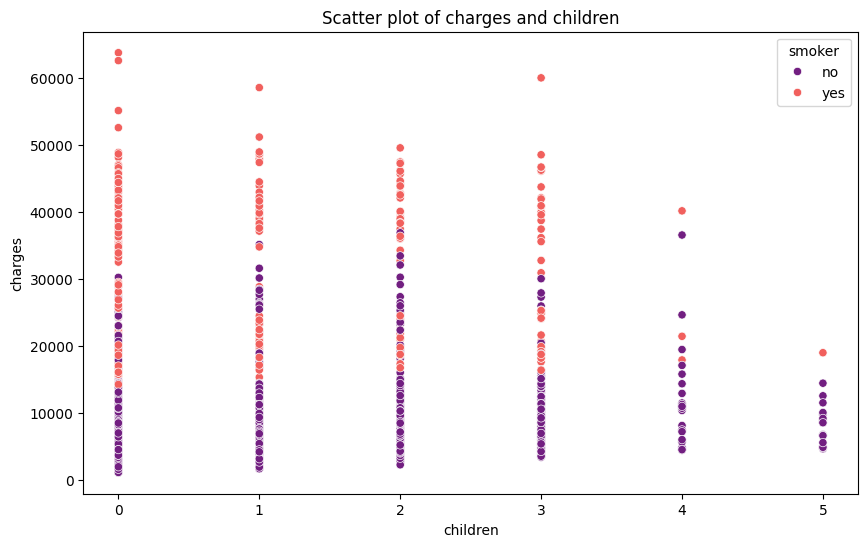

In [39]:
for col in num_cols:
    if col!='charges':
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=col, y='charges', data=df, palette='magma', hue='smoker')
        plt.title(f'Scatter plot of charges and {col}')
        plt.show()

<Figure size 1000x600 with 0 Axes>

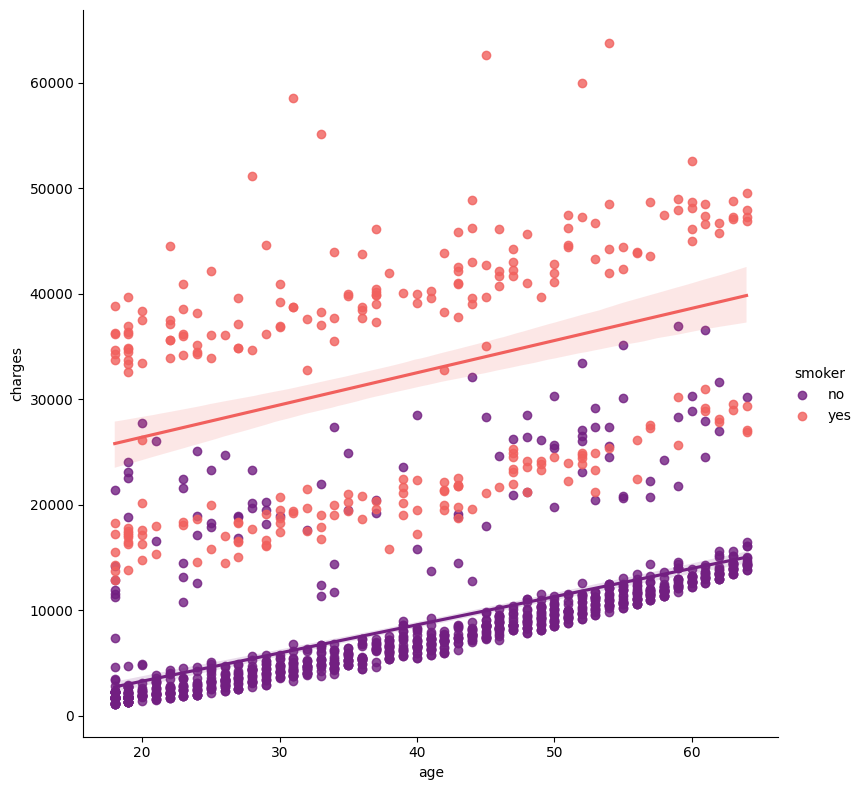

<Figure size 1000x600 with 0 Axes>

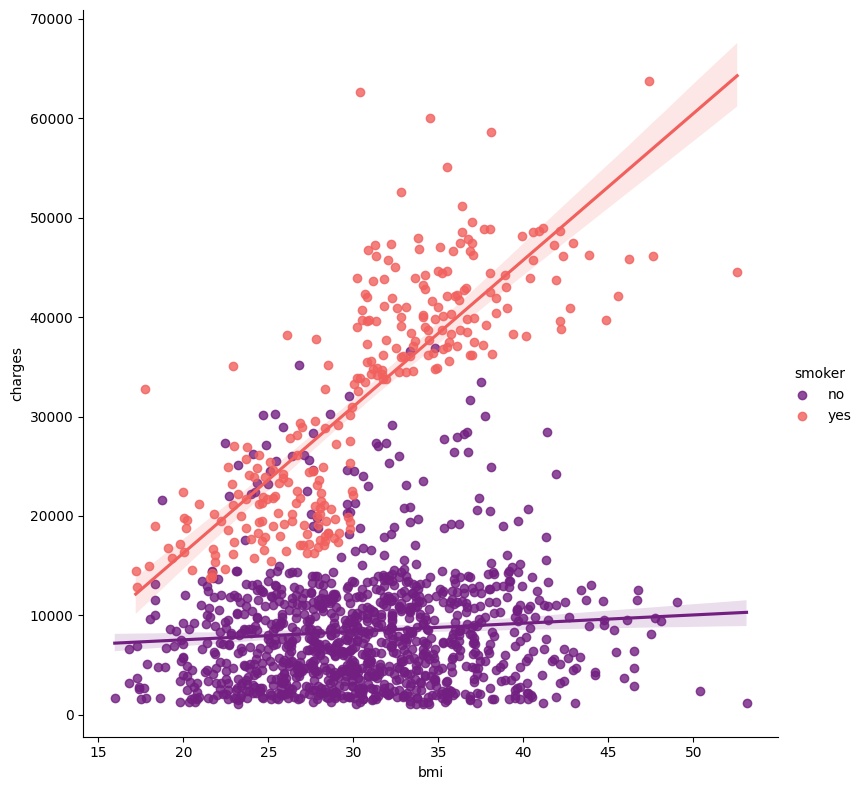

<Figure size 1000x600 with 0 Axes>

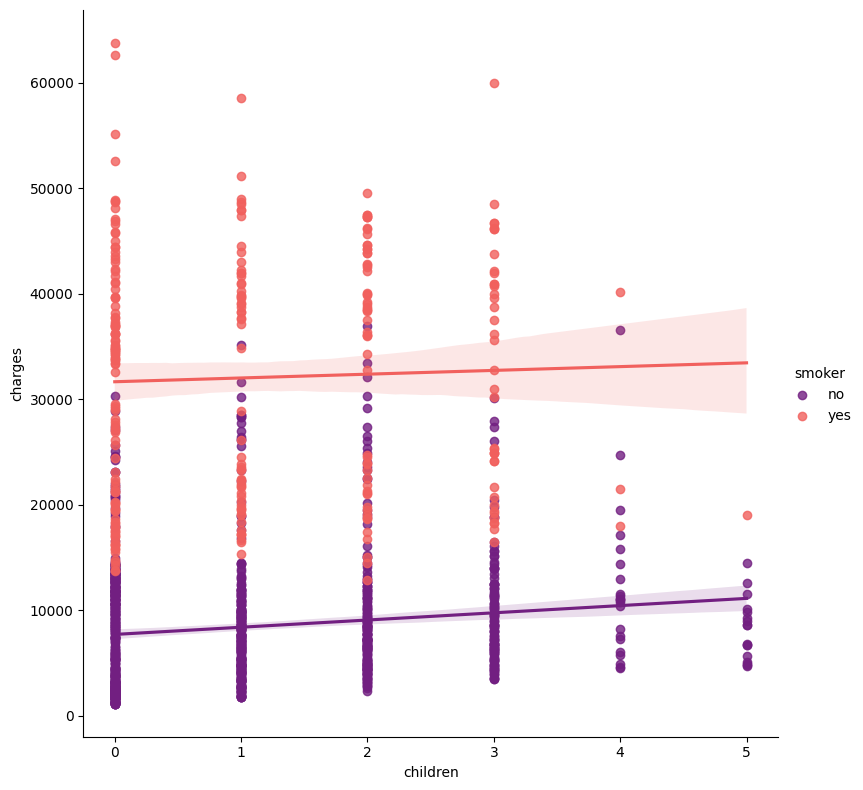

In [40]:
for col in num_cols:
    if col!='charges':
        plt.figure(figsize=(10,6))
        sns.lmplot(x=col, y="charges", hue="smoker", data=df, palette = 'magma', height = 8)
        plt.show()

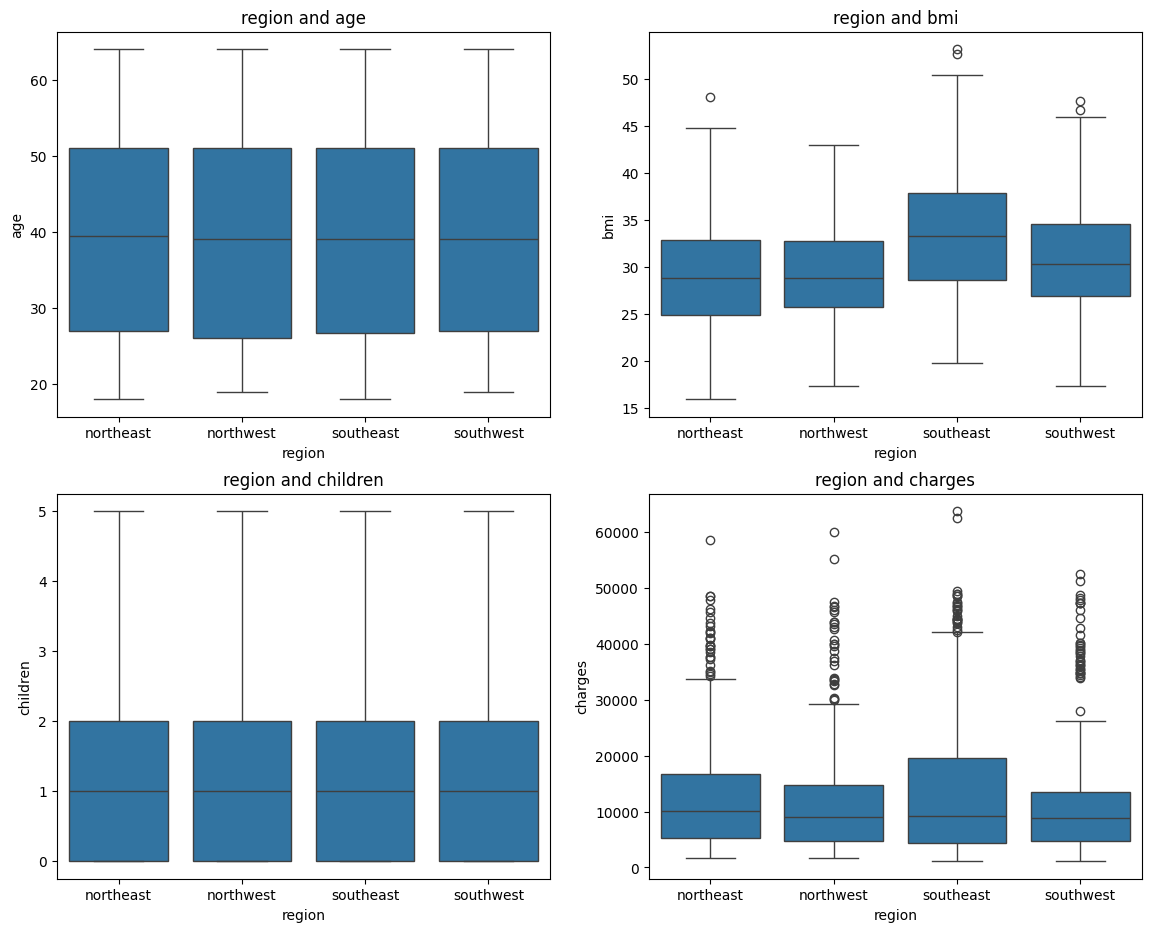

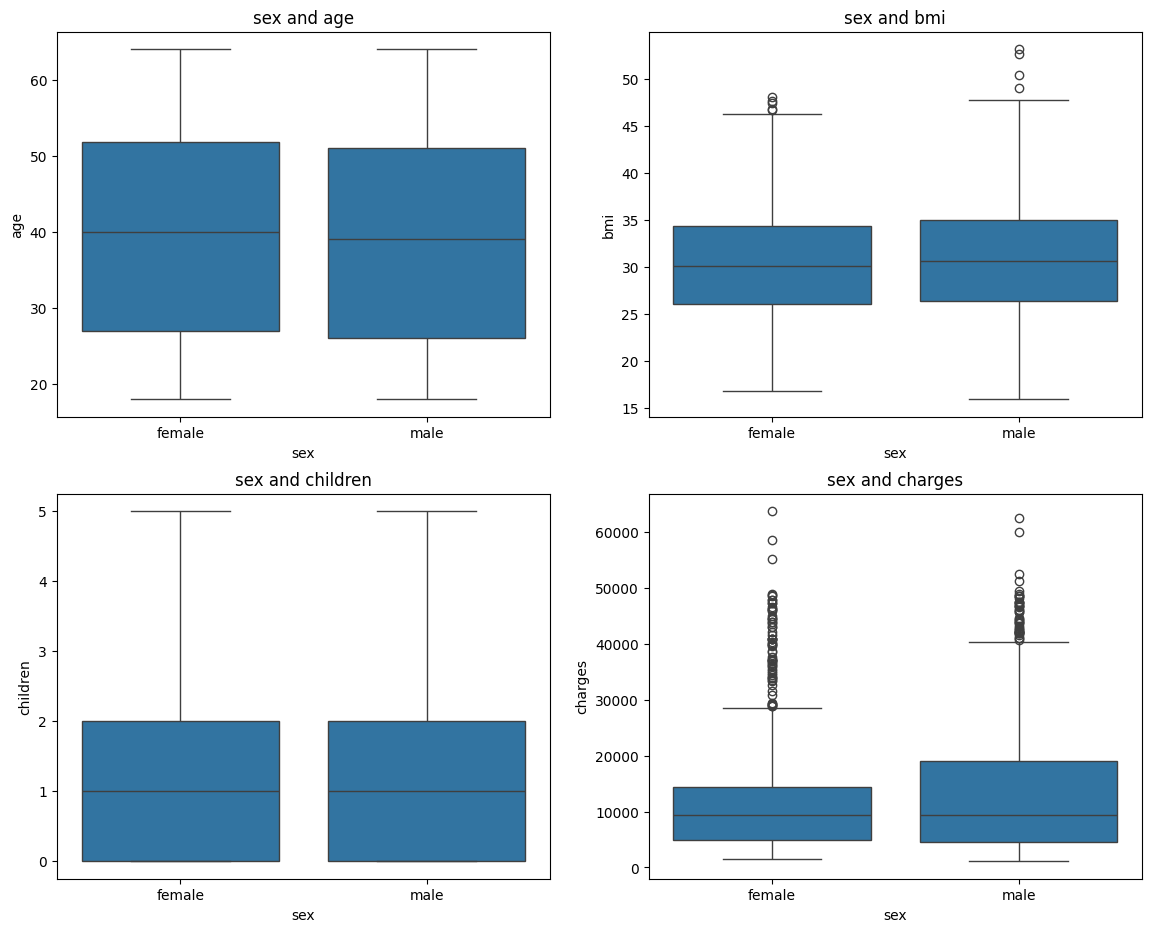

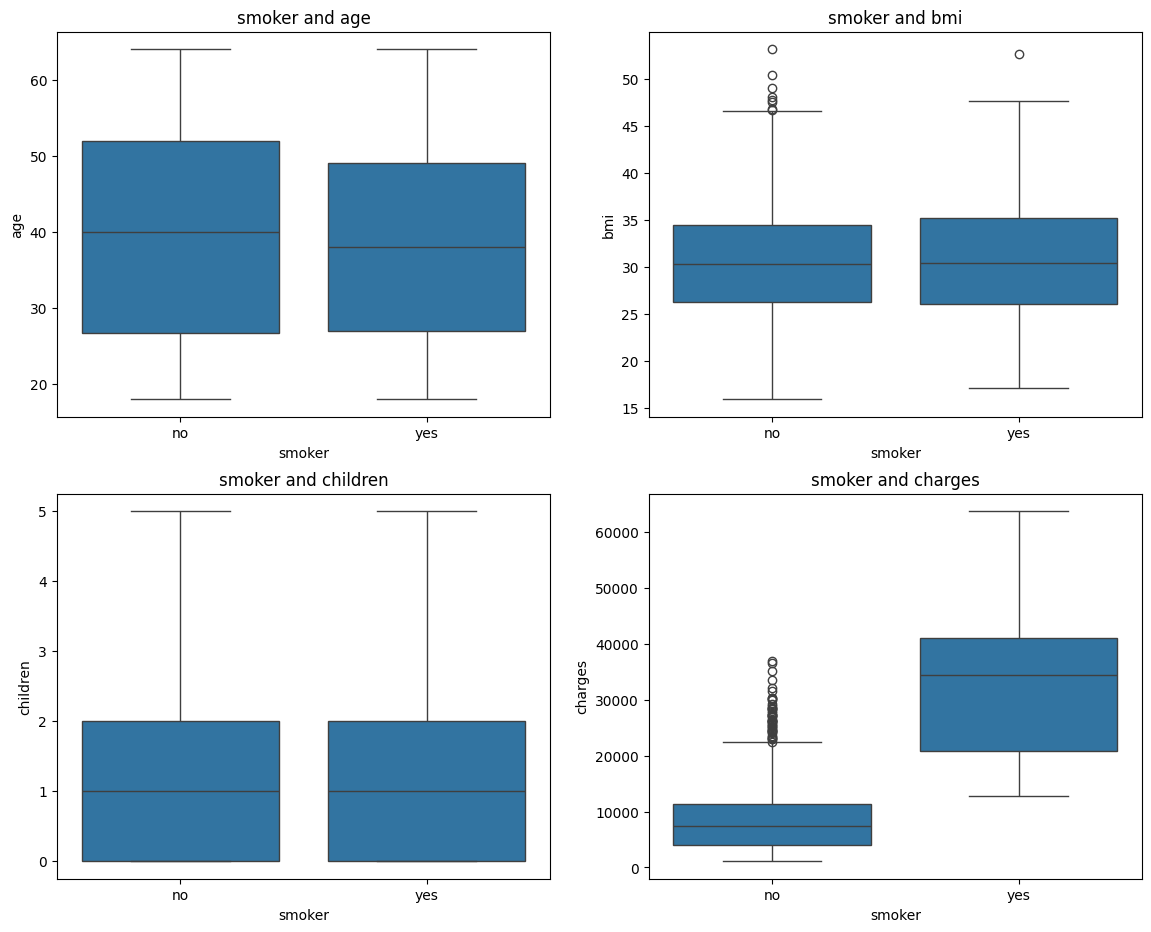

In [41]:
for cat in cat_cols:
    fig, axes =plt.subplots(figsize=(14, 11), ncols=2, nrows=2)

    for number in range(len(num_cols)):
        row, col=number//2, number%2
    
        sns.boxplot(x=cat, y=num_cols[number], data=df, ax=axes[row, col]).set(title=cat+ ' and '+num_cols[number])
        
    plt.show()

##Statistical Analysis

Hypothesis Testing

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 🔍 Hypothesis Test: Comparison of Charges between Smokers and Non-Smokers

**Null Hypothesis (H₀):**  
μ₁ − μ₂ = 0  
The average charges of smokers is equal to the average charges of non-smokers.

**Alternative Hypothesis (H₁):**  
μ₁ − μ₂ ≠ 0  
The average charges of smokers is different from the average charges of non-smokers.

**Significance Level:**  
α = 0.05

**Decision Rule:**  
If the *p-value* is less than α, we **reject the null hypothesis**.


## Checking for basic assumptions

- **Normality check**  
- **Homogeneity of variances**


In [43]:
charges_yes=df[df['smoker']=='yes']['charges']
charges_no=df[df['smoker']=='no']['charges']

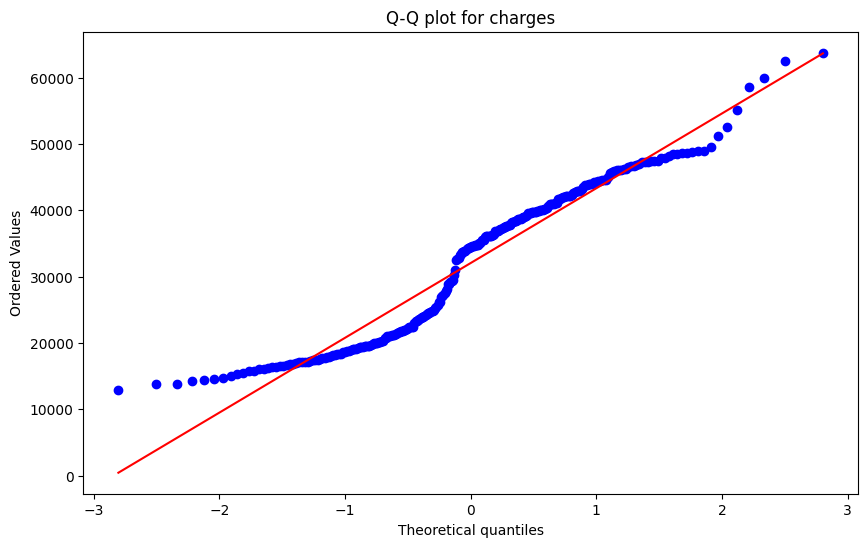

In [44]:
plt.figure(figsize=(10,6))
stats.probplot(charges_yes, plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()

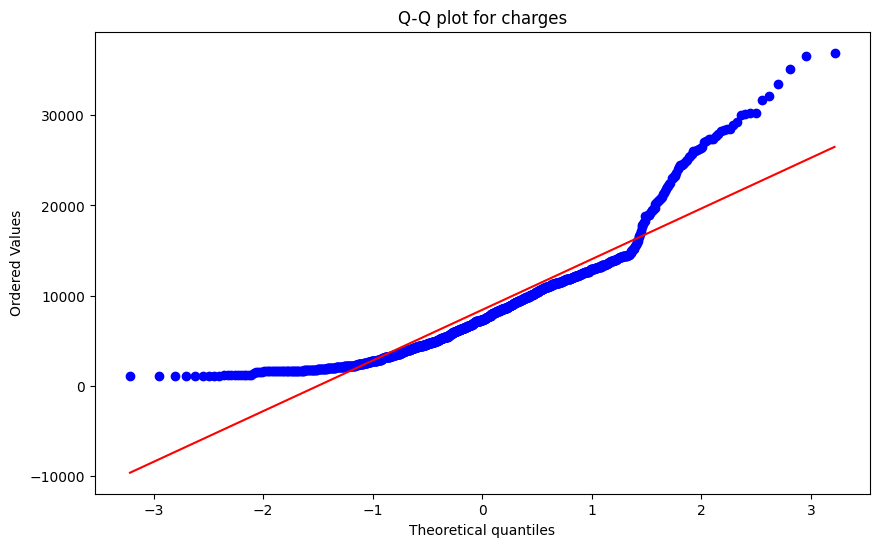

In [45]:
plt.figure(figsize=(10,6))
stats.probplot(charges_no, plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()


In [46]:
stat, p_value = stats.levene(charges_yes, charges_no)

print(p_value)

1.5593284881803726e-66


Reject Null Hypotesis. We reject null hypothesis, which means variance is not equal.

##Two sample T test

In [47]:
#If equal_var is False, perform Welch’s t-test, which does not assume equal population variance
# Perform Welch's t-test (does not assume equal variances)
t_stat, p_value = stats.ttest_ind(charges_yes, charges_no, alternative='two-sided', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 32.751887766341824
P-value: 5.88946444671698e-103


As can be seen, the p value is less than 0.05. So we reject the null hypothesis. This means that there is a significant difference between the average of the groups. So which one is this difference in favor of? Let's test this now

**Null Hypothesis (H0):**  
\[
u1 - u2 <=0
\]  
The average charges of smokers is less than or equal to the average charges of non-smokers.

**Alternative Hypothesis (H1):**  
\[
u1 - u2 < 0
\]  
The average charges of smokers is greater than the average charges of non-smokers.

**Significance Level (α):** 0.05


In [48]:
from scipy.stats import ttest_ind
ttest_ind(charges_no, charges_yes, alternative='less', equal_var=False)


TtestResult(statistic=np.float64(-32.751887766341824), pvalue=np.float64(2.94473222335849e-103), df=np.float64(311.85112492054634))

As can be seen, the p value is less than 0.05. So we reject the null hypothesis. This means that the average charges of smokers are higher than those of non-smokers.



### Does BMI of males differ significantly from that of females?

#### Define Null and Alternative Hypothesis

- **Null Hypothesis (H₀):**  
  μ₁ − μ₂ = 0  
  There is **no difference** between the BMI of males and the BMI of females.

- **Alternative Hypothesis (H₁):**  
  μ₁ − μ₂ ≠ 0  
  There **is a difference** between the BMI of males and the BMI of females.


In [49]:
male_bmi=df[df['sex']=='male']['bmi']
female_bmi=df[df['sex']=='female']['bmi']

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\227907480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_bmi,color='green',hist=False, label='male')
C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\227907480.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

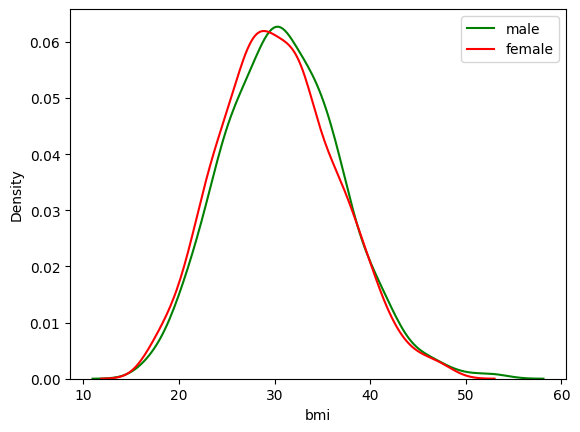

In [50]:
sns.distplot(male_bmi,color='green',hist=False, label='male')
sns.distplot(female_bmi,color='red',hist=False, label='female')
plt.legend()
plt.show()

In [51]:
print(stats.bartlett(male_bmi, female_bmi))

BartlettResult(statistic=np.float64(0.16021820458277752), pvalue=np.float64(0.6889557005998833))


We see that the variances are homogeneous

In [52]:
print(stats.ttest_ind(male_bmi, female_bmi, alternative='two-sided'))

TtestResult(statistic=np.float64(1.696752635752224), pvalue=np.float64(0.08997637178984934), df=np.float64(1336.0))


H0 cannot be rejected. Gender has no effect on bmi as the p_value> 0.05

###Is the proportion of smokers significantly different in different genders?

**Ho: Sex has no effect on smoking habits**

**H1: Sex has an effect on smoking habits**

In [53]:
df[['smoker','sex']].head()

,smoker,sex
0,yes,female
1,no,male
2,no,male
3,no,male
4,no,male


In [54]:
pd.crosstab(df['smoker'], df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [55]:
chi, p_value, dof, expected=stats.chi2_contingency(pd.crosstab(df['smoker'], df['sex']))

print(p_value)

0.006548143503580697


Sex has an effect on smoking habits as the p_value<0.05

###Data Preprocessing

Encoding

In [56]:
df['children']=df['children'].astype('category')

In [66]:
df_encode = pd.get_dummies(df, drop_first=True).astype(int)


In [67]:
df_encode.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,16884,0,0,0,0,0,0,1,0,0,1
1,18,33,1725,1,1,0,0,0,0,0,0,1,0
2,28,33,4449,1,0,0,1,0,0,0,0,1,0
3,33,22,21984,1,0,0,0,0,0,0,1,0,0
4,32,28,3866,1,0,0,0,0,0,0,1,0,0


In [68]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

In [69]:
df_encode.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,9.734122,0,0,0,0,0,0,1,0,0,1
1,18,33,7.452982,1,1,0,0,0,0,0,0,1,0
2,28,33,8.400435,1,0,0,1,0,0,0,0,1,0
3,33,22,9.998070,1,0,0,0,0,0,0,1,0,0
4,32,28,8.259976,1,0,0,0,0,0,0,1,0,0


In [70]:
X = df_encode.drop('charges',axis=1) # Independet variable
Y = df_encode['charges'] # dependent variable

Train Test split

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=23)

Model building

In [80]:
# Scikit Learn module
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

LinearRegression()

In [81]:
#Parameter
thetas = [lin_reg.intercept_]+list(lin_reg.coef_)
print(thetas)


[np.float64(7.067186865303156), np.float64(0.03314266593005809), np.float64(0.01345256214047601), np.float64(-0.06782646724996279), np.float64(0.14941425317983859), np.float64(0.27350179400903973), np.float64(0.24482387318774024), np.float64(0.5234327606325762), np.float64(0.4670199040506523), np.float64(1.550926266104631), np.float64(-0.05553995896876792), np.float64(-0.14673751538769492), np.float64(-0.13381696003494278)]


In [82]:
parameter_df = pd.DataFrame({'Parameter': ['theta_'+str(i) for i in range(len(X.columns)+1)],
                            'Columns':['x_0=1']+list(X.columns),
                            'theta': thetas})

In [83]:
parameter_df

,Parameter,Columns,theta
0,theta_0,x_0=1,7.067187
1,theta_1,age,0.033143
2,theta_2,bmi,0.013453
3,theta_3,sex_male,-0.067826
4,theta_4,children_1,0.149414
5,theta_5,children_2,0.273502
6,theta_6,children_3,0.244824
7,theta_7,children_4,0.523433
8,theta_8,children_5,0.467020
9,theta_9,smoker_yes,1.550926


Model evaluation

In [84]:
Y_train_pred=lin_reg.predict(X_train)

# R_square 
sse = np.sum((Y_train - Y_train_pred)**2)
sst = np.sum((Y_train - Y_train.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for train set :',R_square)

R square obtain for train set : 0.7643941741204912


In [85]:
print('R square obtain for scikit learn library is :',r2_score(Y_train, Y_train_pred))

R square obtain for scikit learn library is : 0.7643941741204912


The model returns R2 value of 76.44%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation.

Prediction

In [86]:
Y_test_pred=lin_reg.predict(X_test)
print(r2_score(Y_test, Y_test_pred))

0.7799079829531507


Model Validation

Check for Linearity

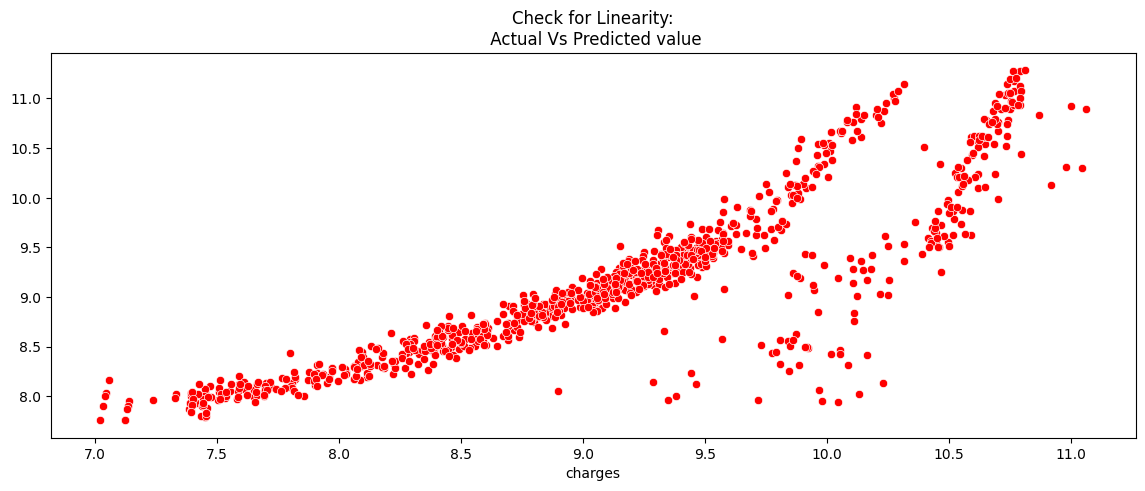

In [88]:
plt.figure(figsize=(14,5))
sns.scatterplot(x=Y_train, y=Y_train_pred, color='r')  # Explicit x= and y=
plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.show()


Check for Residual normality & mean¶


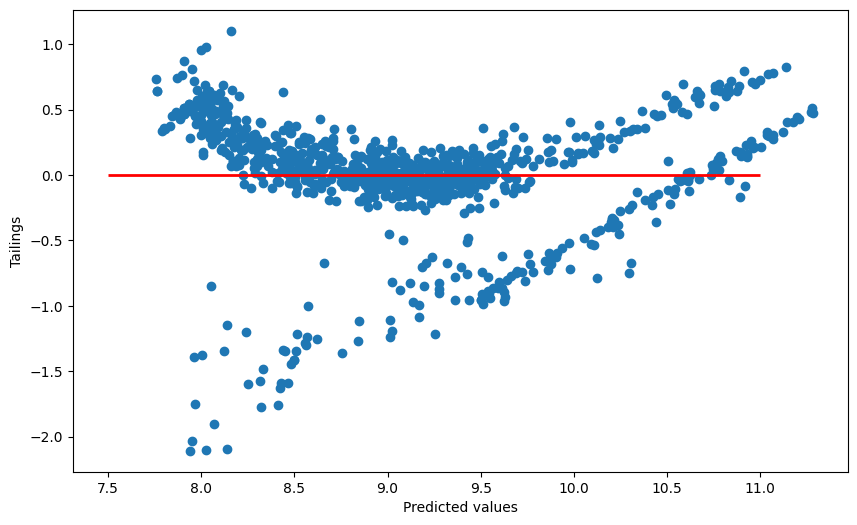

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(Y_train_pred, Y_train_pred - Y_train)
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.hlines(y = 0, xmin = 7.5, xmax = 11, lw = 2, color = 'red')
plt.show()

C:\Users\stargazersham\AppData\Local\Temp\ipykernel_27472\2106410904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_train - Y_train_pred),ax=ax,color='b')


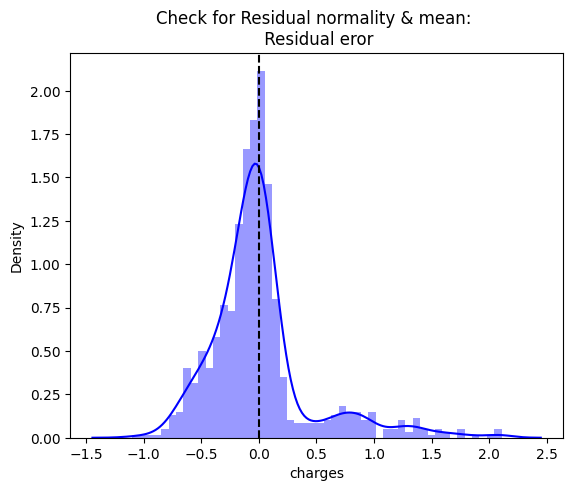

In [90]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(122)
sns.distplot((Y_train - Y_train_pred),ax=ax,color='b')
ax.axvline((Y_train - Y_train_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Check for Multivariate Normality

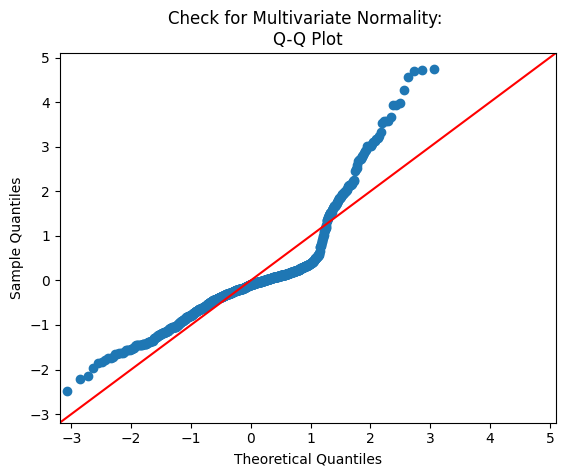

In [91]:
#QQ plot
sm.qqplot((Y_train - Y_train_pred), fit=True, line = '45') 
plt.title('Check for Multivariate Normality: \nQ-Q Plot')
pylab.show()

###Polynomial Regression###

It is a basic and commonly used type of predictive analysis. These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables

In [92]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(X_train)

X_train_poly=poly_reg.transform(X_train)
X_test_poly=poly_reg.transform(X_test)

# Predicting a new result with Polynomial Regression
lr=LinearRegression()
lr.fit(X_train_poly, Y_train)

Y_train_poly_pred = lr.predict(X_train_poly)
Y_test_poly_pred = lr.predict(X_test_poly)


print('R square for train data:', r2_score(Y_train, Y_train_poly_pred))
print('R square for test data:', r2_score(Y_test, Y_test_poly_pred))

R square for train data: 0.8434761058387633
R square for test data: 0.8503941608268277
